In [10]:
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()


from datetime import datetime
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


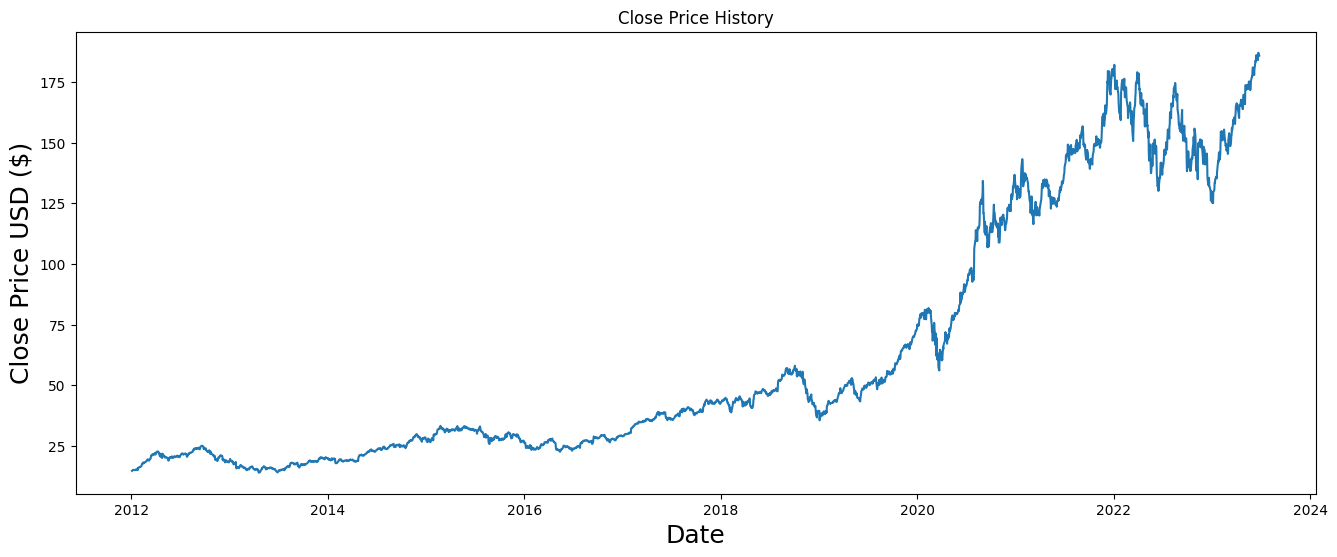

In [11]:
## Prediction

### Getting the dataframe for the stock data

df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())

df

### Plotting the closing price for the stock

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [13]:
df = df[['Adj Close']]

In [14]:
df

,Adj Close
Date,
2012-01-03,12.482927
2012-01-04,12.550013
2012-01-05,12.689341
2012-01-06,12.821991
2012-01-09,12.801655
...,...
2023-06-20,185.009995
2023-06-21,183.960007
2023-06-22,187.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2888 entries, 2012-01-03 to 2023-06-26
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2888 non-null   float64
dtypes: float64(1)
memory usage: 45.1 KB


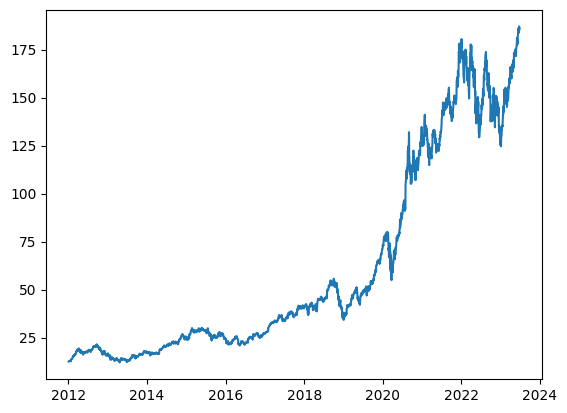

<Figure size 1200x700 with 0 Axes>

In [24]:
import pandas_ta

In [46]:
df = df[['Adj Close']]
df.ta.ema(close='Adj close', length=10, append=True)
df = df.iloc[10:]


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df[['Adj Close']],df[['EMA_10']])

print(x_test.describe())

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

        Adj Close
count  717.000000
mean    58.698432
std     50.521740
min     12.280292
25%     22.126841
50%     36.599663
75%     78.038498
max    187.000000
Model Coefficients: [[0.99415205]]
Mean Absolute Error: 1.096937971846491
Coefficient of Determination: 0.9985761780783461


In [29]:
df

,Adj Close,EMA_10
Date,,
2012-01-03,12.482927,NaN
2012-01-04,12.550013,NaN
2012-01-05,12.689341,NaN
2012-01-06,12.821991,NaN
2012-01-09,12.801655,NaN
...,...,...
2023-06-20,185.009995,182.871742
2023-06-21,183.960007,183.069608
2023-06-22,187.000000,183.784225


In [30]:
df = df.iloc[10:]

In [31]:
df

,Adj Close,EMA_10
Date,,
2012-01-18,13.025679,12.795744
2012-01-19,12.984392,12.830044
2012-01-20,12.758247,12.816990
2012-01-23,12.974072,12.845550
2012-01-24,12.761589,12.830285
...,...,...
2023-06-20,185.009995,182.871742
2023-06-21,183.960007,183.069608
2023-06-22,187.000000,183.784225


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(df[['Adj Close']],df[['EMA_10']])

In [36]:
print(x_test.describe())

        Adj Close
count  720.000000
mean    59.454769
std     49.598878
min     12.209951
25%     22.889999
50%     36.958321
75%     87.120169
max    183.949997


In [37]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [40]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.99446473]]
Mean Absolute Error: 1.1430410451447204
Coefficient of Determination: 0.9984485153807001


In [43]:
y_pred

array([[148.82352766],
       [ 16.49885218],
       [149.92415199],
       [137.00577652],
       [ 43.87807921],
       [ 21.72935754],
       [143.40076926],
       [ 26.52936723],
       [ 22.53243227],
       [114.46976808],
       [131.97155678],
       [ 92.85211753],
       [ 44.40323234],
       [ 77.49297423],
       [179.62868729],
       [ 29.66708433],
       [149.19186929],
       [ 50.41863927],
       [ 15.6870266 ],
       [ 36.19323448],
       [ 23.10864132],
       [117.13628438],
       [ 16.51557429],
       [ 24.58233598],
       [ 35.7463695 ],
       [112.89498395],
       [ 45.70083461],
       [172.0906428 ],
       [ 28.66597704],
       [141.50666417],
       [ 58.96586759],
       [ 50.64354557],
       [ 40.4869698 ],
       [151.34767083],
       [ 14.6080788 ],
       [124.01751569],
       [ 27.89489927],
       [ 16.28227469],
       [ 40.39031312],
       [ 24.45228061],
       [ 21.94246011],
       [ 50.99254372],
       [ 15.19745632],
       [ 26

In [48]:
model.predict([[146.8787]])

C:\Users\muday\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[146.12743045]])

,Adj Close
Date,
2018-11-28,43.532948
2016-07-06,22.052248
2023-02-09,150.431915
2020-01-23,77.958595
2020-07-09,94.009972
...,...
2012-11-21,17.201870
2015-03-24,28.539242
2021-03-26,119.602882
